# SVM案例：使用SVM进行乳腺癌预测

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 载入数据，乳腺癌数据集（Breast Cancer dataset），这是一个常用的二分类数据集，用于预测患者的肿瘤是否为恶性
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data # 提取特征数据并存储在变量 X 中
y = cancer.target # 提取目标标签（肿瘤是否为恶性）并存储在变量 y 中
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))

data shape: (569, 30); no. positive: 357; no. negative: 212


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

接下来选择合适的核函数来构建SVM，具体选哪种呢？

## 高斯核函数
- 样本量不大，需要选择合适的核函数，先尝试使用高斯核函数对样本分类

In [4]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

train score: 1.0; test score: 0.631578947368421


- 高斯核函数情况下，评分不高
- 尝试不同gamma值情况下，高斯核函数的模型评分，采用GridSearchCV进行参数组合

/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  

best param: {'gamma': 0.00011379310344827585}
best score: 0.9367311072056239


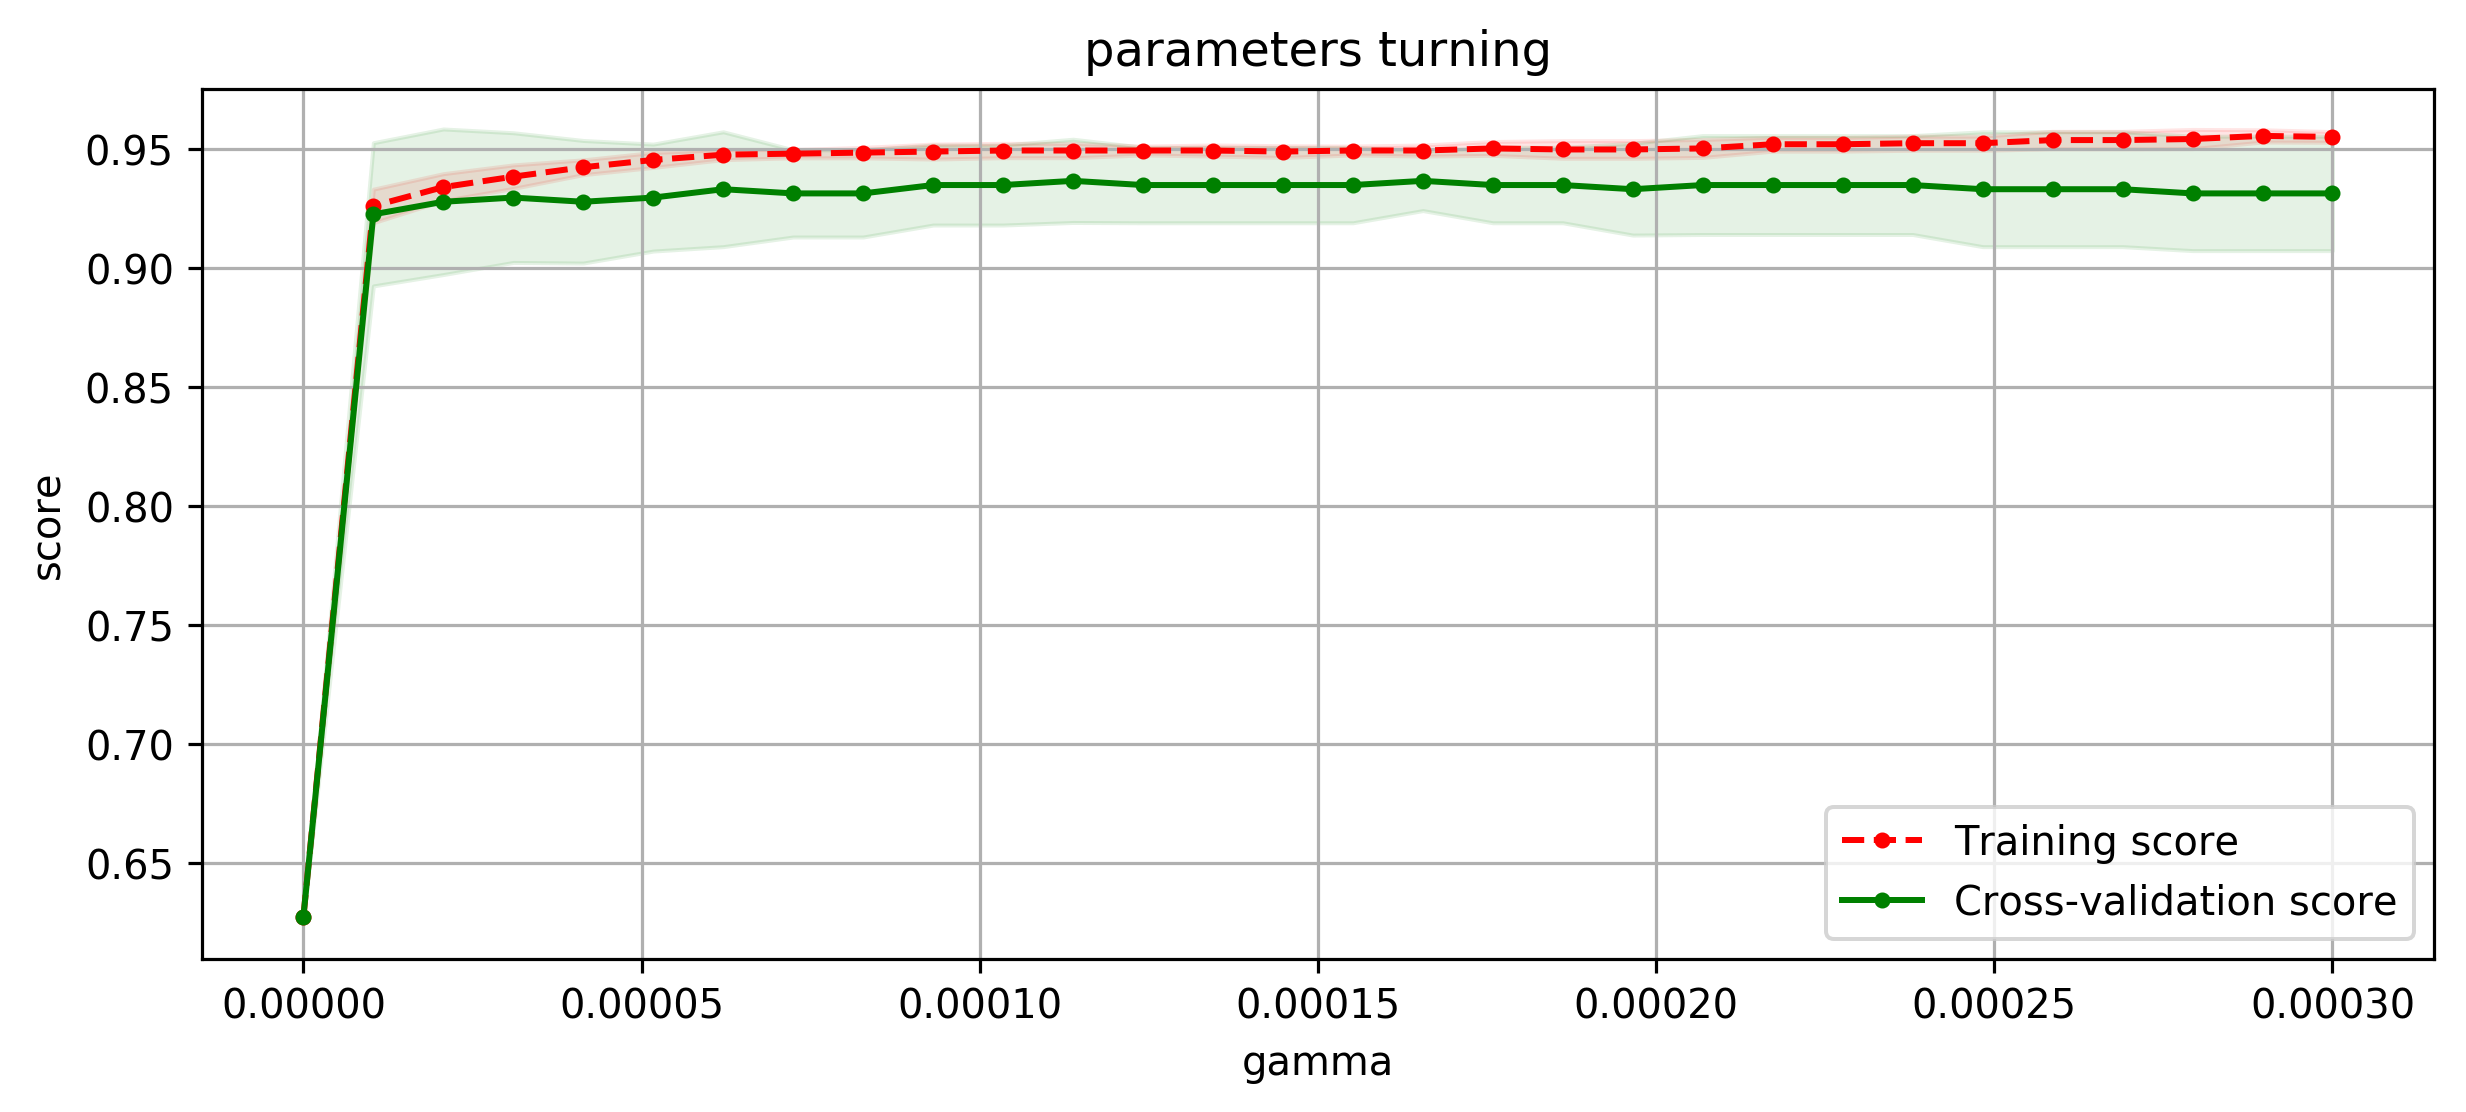

In [5]:
from common.utils import plot_param_curve
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0, 0.0003, 30)# 取从0到0.0003之间的30个点作为gamma值进行尝试
param_grid = {'gamma': gammas} # 定义参数网格，只包含 gamma 参数
clf = GridSearchCV(SVC(), param_grid, cv=5)#每次尝试都进行5折交叉验证
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_,
                                                clf.best_score_))#打印出评分最高时的参数值和评分

plt.figure(figsize=(10, 4), dpi=144)
plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma');

- 画出gama为0.01时候构建的SVM模型对应的学习曲线 

<Figure size 1440x576 with 0 Axes>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

elaspe: 0.582505


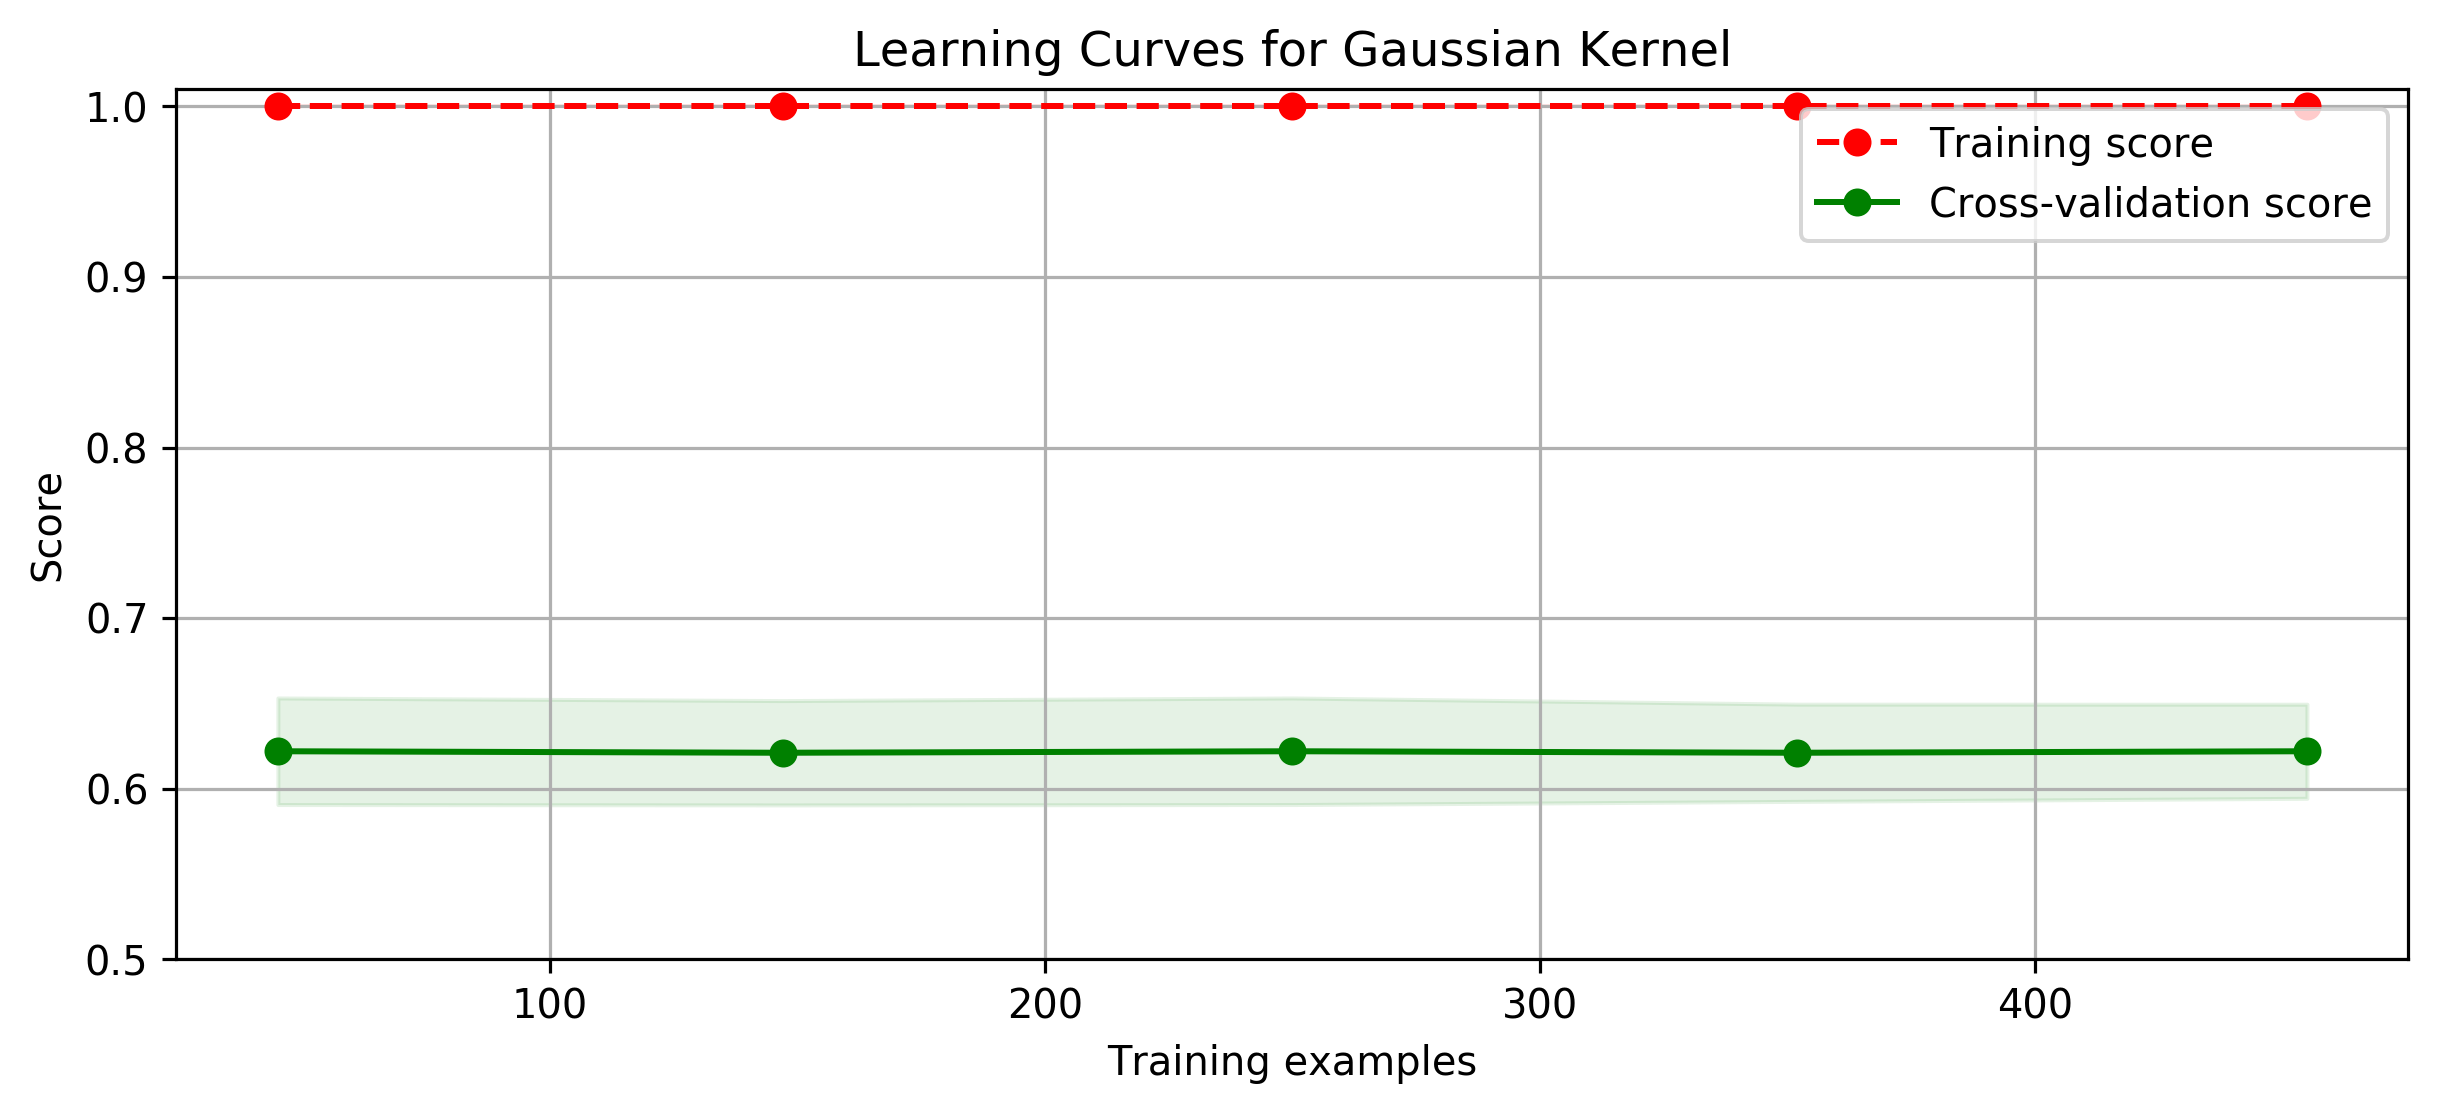

In [6]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

# 创建 ShuffleSplit 实例，设置10次分割，测试集大小为20%，随机种子为0。
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) 
title = 'Learning Curves for Gaussian Kernel'

start = time.clock()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))

可见高斯核函数对于小数据量很容易发生过拟合

## 多项式核函数
- 尝试使用多项式核函数对上述样本进行分类
- 使用ShuffleSplit()函数将数据集打乱，划分训练集和测试集
- 先尝试二阶多项式

In [7]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='poly', degree=2)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

train score: 0.9802197802197802; test score: 0.9736842105263158


- 分别尝试一阶二阶多项式

<Figure size 1728x576 with 0 Axes>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

elaspe: 0.260532


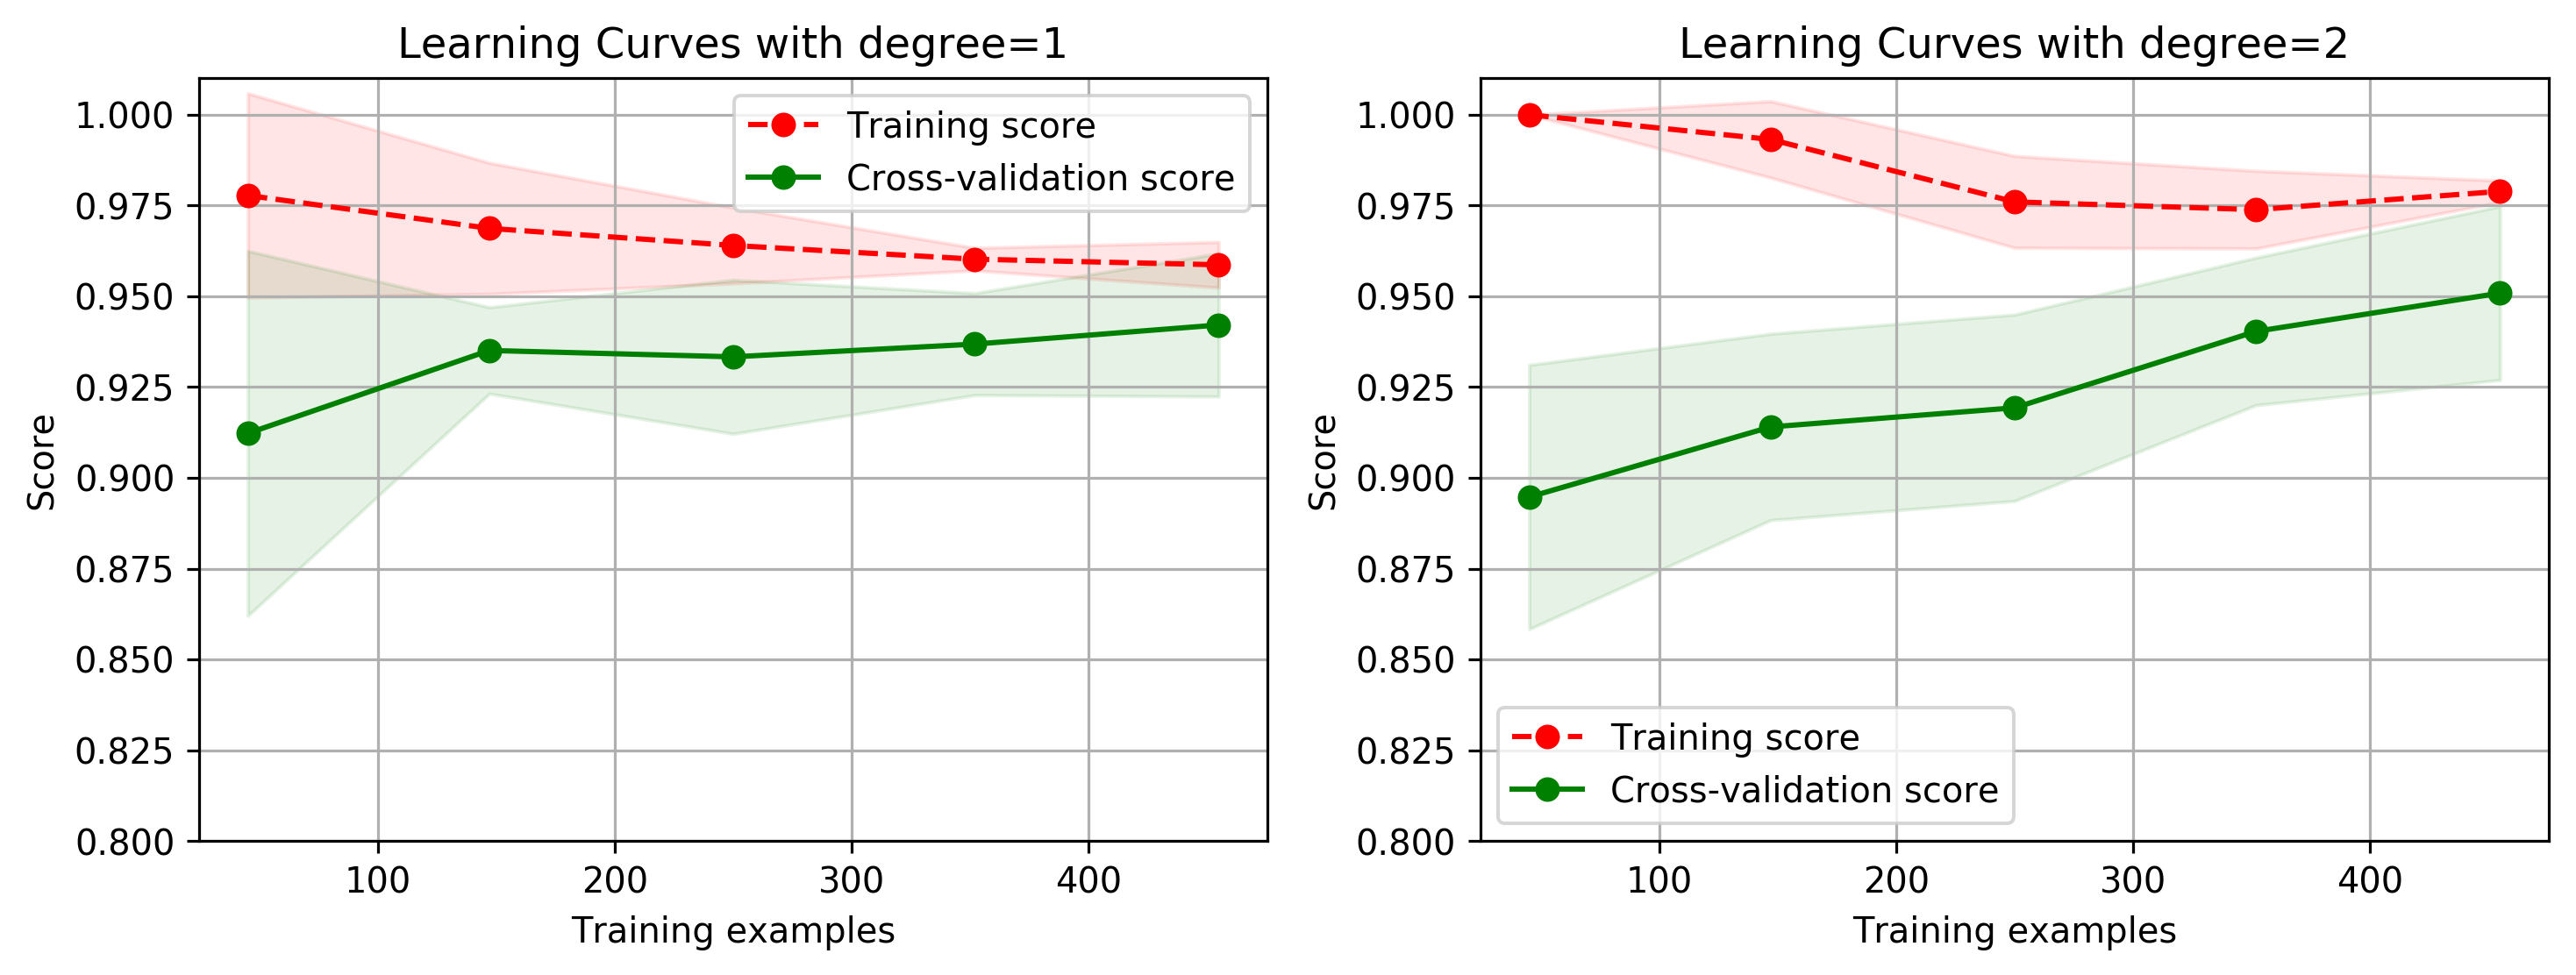

In [8]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)#创建 ShuffleSplit 实例，设置5次分割，测试集大小为20%，随机种子为0。
title = 'Learning Curves with degree={0}'
degrees = [1, 2]

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    # 调用 plot_learning_curve 函数绘制学习曲线，使用多项式核的SVM分类器，
    # 设置图表标题，数据集 X 和 y，y轴限制为0.8到1.01，以及交叉验证策略 cv 和并行作业数 n_jobs=4。
    plot_learning_curve(plt, SVC(C=1.0, kernel='poly', degree=degrees[i]),
                        title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=4)

print('elaspe: {0:.6f}'.format(time.clock()-start))

可以看出二阶多项式的预测效果更好